# MongoDB

### 1. Type “mongosh” to enter to the mongo shell* program

*The mongo shell is an interactive JavaScript interface to MongoDB. 
You can use the mongo shell to query and update data as well as perform administrative operations. 

### 2. Type “*show dbs;*” to show existing databases.

### 3. Type “*use dbname;*” to create or use existing “dbname” database.

### 4. Type “*show tables;*” to show existing tables.

### 5. MongoDB CRUD (Create, Read, Update, Delete) Operations
#### Create Operations

Create or insert operations add new documents to a collection. 
If the collection does not currently exist, insert operations will create the collection. 
MongoDB provides the following methods to insert documents into a collection:

*db.collection.insertOne();*

*db.collection.insertMany();*

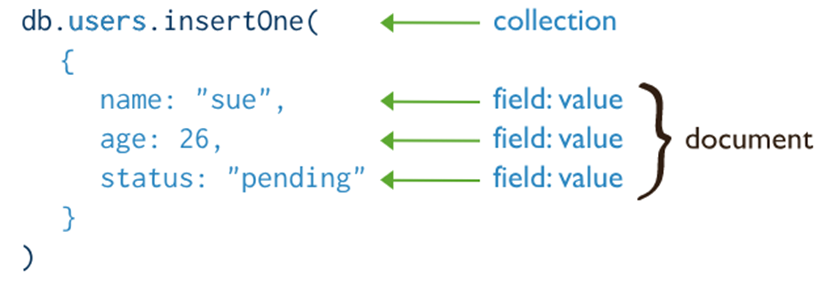

#### Read Operations
Read operations retrieves documents from a collection; i.e. queries a collection for documents. 
MongoDB provides the following methods to read documents from a collection:

*db.collection.find();*

You can specify query filters or criteria that identify the documents to return.

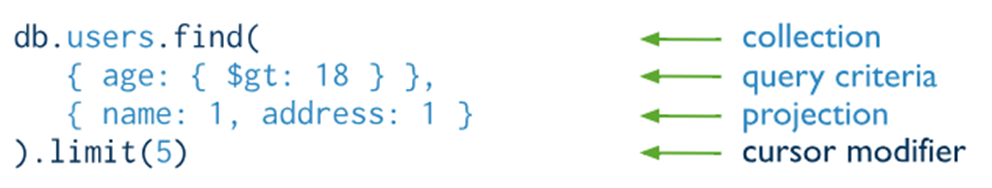

#### Update Operations
Update operations modify existing documents in a collection. 
MongoDB provides the following methods to update documents of a collection:

*db.collection.updateOne();*

*db.collection.updateMany();*

*db.collection.replaceOne();*

You can specify criteria, or filters, that identify the documents to update.
These filters use the same syntax as read operations.

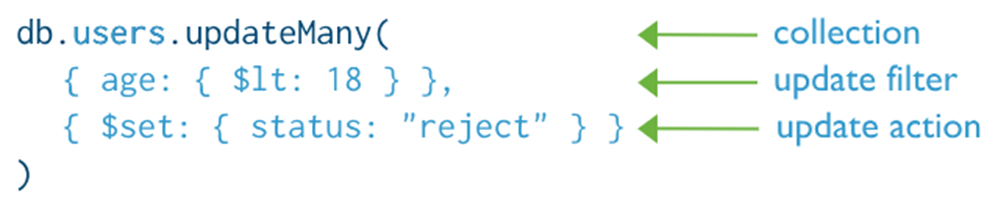

#### Delete Operations
Delete operations remove documents from a collection. 
MongoDB provides the following methods to delete documents of a collection:

*db.collection.deleteOne();*

*db.collection.deleteMany();*

You can specify criteria, or filters, that identify the documents to remove. 
These filters use the same syntax as read operations.

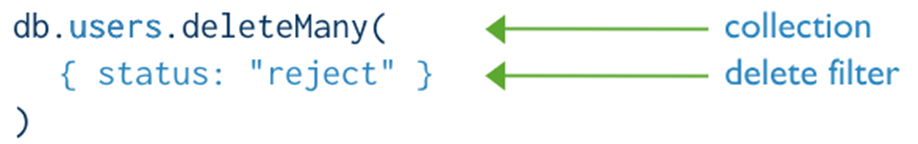

In [ ]:
# Install Pymongo (MongoDB library for Python)
!pip install pymongo

# Case study

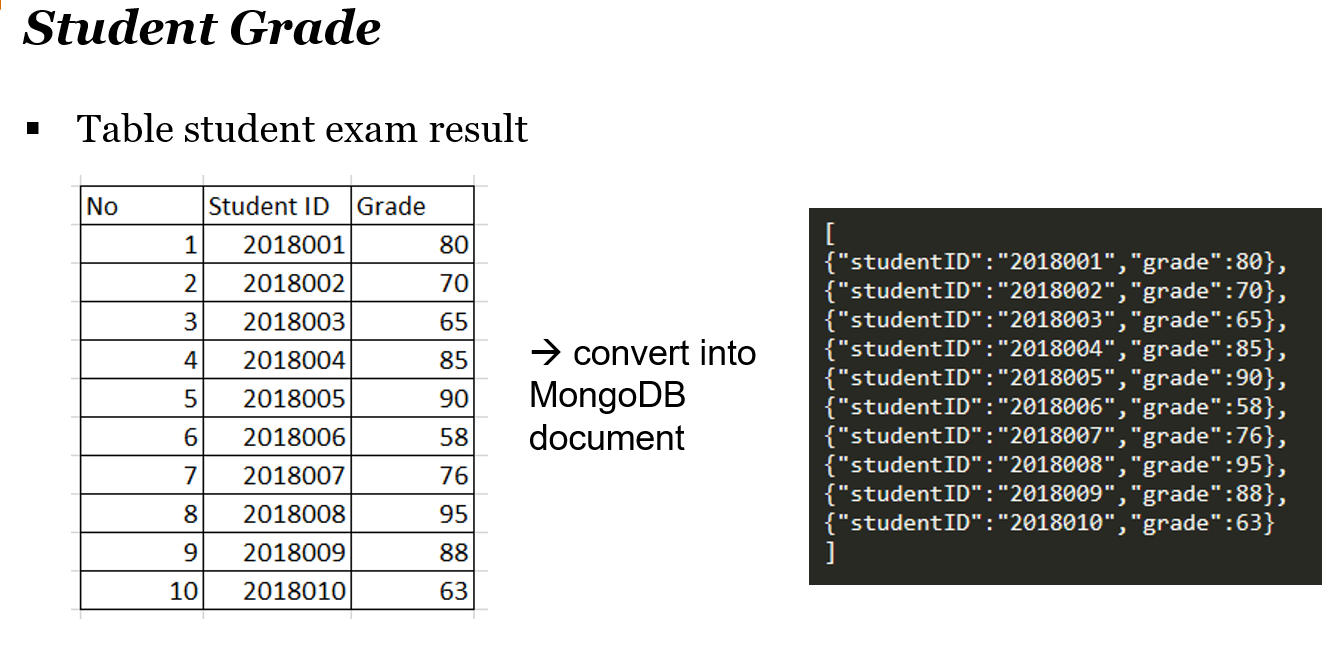

In [ ]:
#import the pymongo module
from pymongo import MongoClient

In [ ]:
# connect to local mongodb server / localhost
client = MongoClient('localhost', 27017) # 27017 is default port for mongodb

In [ ]:
# get a database instance
db = client.studentDb # studentDb is the database name.

In [ ]:
# get a collection/table instance
collection = db.grades # grades is the collection/table name.

In [ ]:
gradesData = [{"studentID":"2018001","grade":80},{"studentID":"2018002","grade":70},{"studentID":"2018003","grade":65},{"studentID":"2018004","grade":85},{"studentID":"2018005","grade":90},{"studentID":"2018006","grade":58},{"studentID":"2018007","grade":76},{"studentID":"2018008","grade":95},{"studentID":"2018009","grade":88},{"studentID":"2018010","grade":63}]

In [ ]:
# save all the data into MongoDB
collection.insert_many(gradesData)

In [ ]:
# show all data
# read data assign it into variable
dtcursor = collection.find()

# iterate the data using looping to show all data
for dt in dtcursor:
    print(dt)

## Make the function to convert the grade value to letter (A,B,C,D,F)
Using the following rules:
- Grade Letter “A” -> more than or equal 90
- Grade Letter “B ” -> more than or equal 80 and below 90
- Grade Letter “C” -> more than or equal 70 and below 80
- Grade Letter “D” -> more than or equal 60 and below 70
- Grade Letter “F” -> below 60

In [ ]:
# function to get the grade letter
def getGradeLetter(grade):
    if(grade>=90):
        return "A"
    elif(grade>=80 and grade<90):
        return "B"
    elif(grade>=70 and grade <80):
        return "C"
    elif(grade>=60 and grade <70):
        return "D"
    else:
        return "F"

In [ ]:
# print out the grade letter
gradeLetter = getGradeLetter(90)
print("Your Grade Letter is", gradeLetter)

## Update the grade table and set the grade letter
- Call the “getGradeLetter()” function
- Set the updated key “letter” 
- And update the data one by one 

In [ ]:
# read all data and assign it into variable
dtcursor = collection.find()

# iterate the data using looping to show all data
for dt in dtcursor:
    #get the grade letter by passing the grade value
    gradeLetter = getGradeLetter(dt["grade"])
    
    # add new key "letter" and assign the letter value
    setUpdated = {"$set": {"letter": gradeLetter}}
    
    # update_one based on key _id
    collection.update_one({'_id':dt["_id"]}, setUpdated , upsert=False)

In [ ]:
# show all data
# read data assign it into variable
dtcursor = collection.find()

# iterate the data using looping to show all data
for dt in dtcursor:
    print(dt)

# Exercise
### 1. Convert the following table and insert the data into MongoDB collection: 
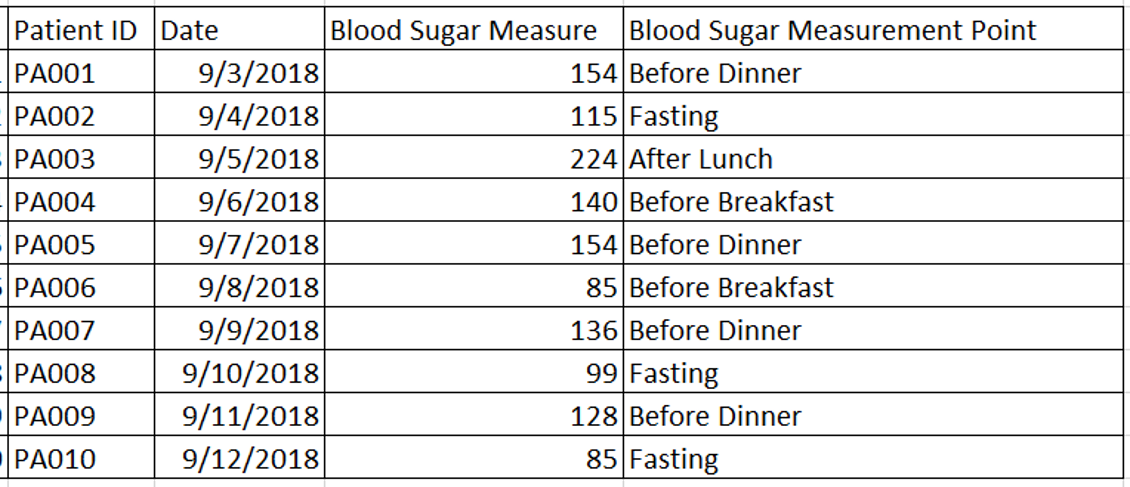

### 2. Create function/s to get the value of
- Average of Blood Sugar from all the patients data
- Percentage of Low Blood Sugar (< 70) from all the patients data
- Percentage of In Range Blood Sugar (70-180) from all the patients data
- Percentage of High Blood Sugar (>150) from all the patients data
- Percentage of Very High Blood Sugar (>250) from all the patients data

### 3. Find the patient who has (use query selector)
- Low Blood Sugar (< 70)
- In Range Blood Sugar (70-180)
- High Blood Sugar (>150)
- Very High Blood Sugar (>250)


### 4. Count how many patient who has measurement point at  (use .count() to count the number of data)
- Before Dinner
- Fasting
- Before Breakfast
- After Lunch

### 5. Print out all the result from question no 1, 2, 3, and 4.

## References:
- Pymongo docs: https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html
- Query selectors: https://www.mongodb.com/docs/manual/reference/operator/query/#query-selectors